c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0374
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy within 10%: 0.0499
Accuracy within 15%: 0.0787
Accuracy within 20%: 0.0997


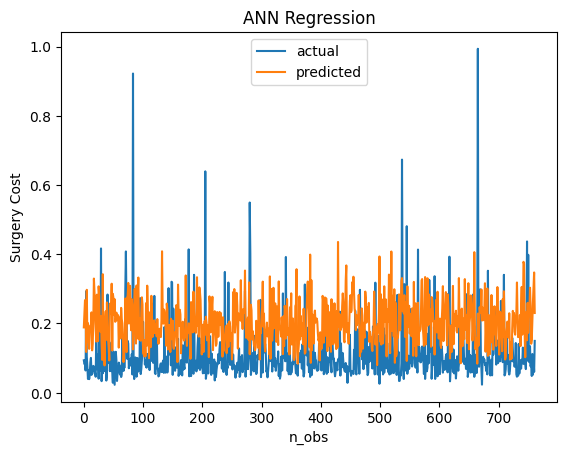

In [ ]:
# STAT 574 HW3 Problem 3

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from statistics import mean
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt

hospital_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/hospital_data.csv")
gender_code = {'M':1, 'F':0}
hospital_data["gender"] = hospital_data["gender"].map(gender_code)

# Scaling the data to fall within [0,1]. 

scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit_transform(hospital_data)
scaled_hospital = pd.DataFrame(scaler_fit, columns = hospital_data.columns)

X = scaled_hospital.iloc[:, 0:6].values
y = scaled_hospital.iloc[:, 6].values

# Splitting the data into 80% training and 20% testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                    random_state=315205)

# Constructing an ANN for regression. 
# Using the sequential model, we initialize the input layer using the sigmoid activation
# function in the output layer.

tf.random.set_seed(112113)

reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the Adam optimizer, a built-in optimizer from Keras.
# Traditionally, learning rates are set to 0.001 but can be adjusted in projects
# during hyperparameter tuning. We use 0.001 for this exercise.

reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=['mean_squared_error'])

reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

# Accuracy within 10%

accuracy10 = mean(ind10)
print("Accuracy within 10%:", round(accuracy10, 4))

# Accuracy within 15% 

accuracy15 = mean(ind15)
print("Accuracy within 15%:", round(accuracy15, 4))

# Accuracy within 20%

accuracy20 = mean(ind20)
print("Accuracy within 20%:", round(accuracy20, 4))

# Plotting actual vs. predicted observations and observation number. 

n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('Surgery Cost')
plt.title('ANN Regression')
plt.legend()
plt.show()

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0150  
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy within 10%: 0.1181
Accuracy within 15%: 0.1942
Accuracy within 20%: 0.2546


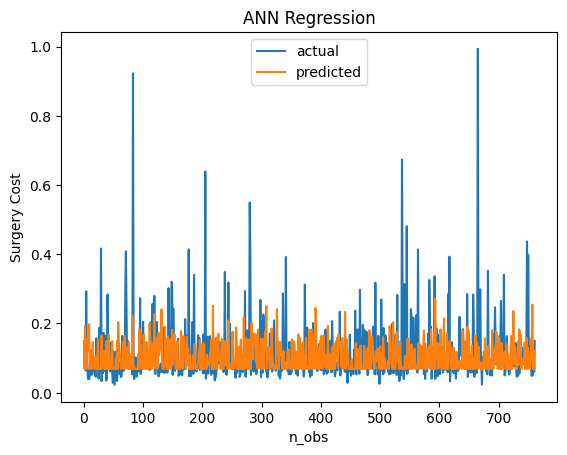

In [ ]:
# Using the sequential model, we initialize the input layer using the tanh activation
# function in the output layer.

tf.random.set_seed(450560)

reg_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(1, activation="tanh")
])

# Compile the model with the Adam optimizer, a built-in optimizer from Keras.
# Traditionally, learning rates are set to 0.001 but can be adjusted in projects
# during hyperparameter tuning. We use 0.001 for this exercise.

reg_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=['mean_squared_error'])

reg_model2.fit(X_train, y_train)

y_pred = reg_model2.predict(X_test)

ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

# Accuracy within 10%

accuracy10 = mean(ind10)
print("Accuracy within 10%:", round(accuracy10, 4))

# Accuracy within 15% 

accuracy15 = mean(ind15)
print("Accuracy within 15%:", round(accuracy15, 4))

# Accuracy within 20%

accuracy20 = mean(ind20)
print("Accuracy within 20%:", round(accuracy20, 4))

# Plotting actual vs. predicted observations and observation number. 

n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('Surgery Cost')
plt.title('ANN Regression')
plt.legend()
plt.show()